# **ANALIZA** **SENTIMENATA**

## Ucitavanje podataka

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import re
from nltk.corpus import stopwords

In [2]:
train_df = pd.read_csv('data/train.csv', header=None, names=['label', 'title', 'review'])
test_df = pd.read_csv('data/test.csv', header=None, names=['label', 'title', 'review'])

In [3]:
print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)

Train shape: (3600000, 3)
Test shape: (400000, 3)


In [4]:
train_df.head()

,label,title,review
0,2,Stuning even for the non-gamer,This sound track was beautiful! It paints the ...
1,2,The best soundtrack ever to anything.,I'm reading a lot of reviews saying that this ...
2,2,Amazing!,This soundtrack is my favorite music of all ti...
3,2,Excellent Soundtrack,I truly like this soundtrack and I enjoy video...
4,2,"Remember, Pull Your Jaw Off The Floor After He...","If you've played the game, you know how divine..."


In [5]:
test_df.head()

,label,title,review
0,2,Great CD,My lovely Pat has one of the GREAT voices of h...
1,2,One of the best game music soundtracks - for a...,Despite the fact that I have only played a sma...
2,1,Batteries died within a year ...,I bought this charger in Jul 2003 and it worke...
3,2,"works fine, but Maha Energy is better",Check out Maha Energy's website. Their Powerex...
4,2,Great for the non-audiophile,Reviewed quite a bit of the combo players and ...


### Provera praznih vrednosti

In [6]:
print("Prazni redovi u train setu:\n",train_df.isnull().sum())
print("Prazni redovi u test setu:\n",test_df.isnull().sum())

Prazni redovi u train setu:
 label       0
title     207
review      0
dtype: int64
Prazni redovi u test setu:
 label      0
title     24
review     0
dtype: int64


In [7]:
train_df = train_df.fillna('')
test_df = test_df.fillna('')

### Provera duplikata

In [8]:
print("Duplikati u train setu:", train_df.duplicated().sum())
print("Duplikati u test setu:", test_df.duplicated().sum())

Duplikati u train setu: 0
Duplikati u test setu: 0


### Broj jedinstvenih vrednosti

In [9]:
print("Jedinstvene labele:", train_df['label'].unique())
print("Broj pojavljivanja labela:\n", train_df['label'].value_counts())

Jedinstvene labele: [2 1]
Broj pojavljivanja labela:
 label
2    1800000
1    1800000
Name: count, dtype: int64


In [10]:
print("Jedinstvene labele:", test_df['label'].unique())
print("Broj pojavljivanja labela:\n", test_df['label'].value_counts())

Jedinstvene labele: [2 1]
Broj pojavljivanja labela:
 label
2    200000
1    200000
Name: count, dtype: int64


### Spajanje title i review

In [11]:
train_df['text'] = train_df['title'].astype(str) + " " + train_df['review'].astype(str)
test_df['text'] = test_df['title'].astype(str) + " " + test_df['review'].astype(str)

In [12]:
train_df[['label', 'text']].head(5)

,label,text
0,2,Stuning even for the non-gamer This sound trac...
1,2,The best soundtrack ever to anything. I'm read...
2,2,Amazing! This soundtrack is my favorite music ...
3,2,Excellent Soundtrack I truly like this soundtr...
4,2,"Remember, Pull Your Jaw Off The Floor After He..."


In [13]:
test_df[['label', 'text']].head(5)

,label,text
0,2,Great CD My lovely Pat has one of the GREAT vo...
1,2,One of the best game music soundtracks - for a...
2,1,Batteries died within a year ... I bought this...
3,2,"works fine, but Maha Energy is better Check ou..."
4,2,Great for the non-audiophile Reviewed quite a ...


## EDA

### Distribucija labela (klasa)

/var/folders/yw/kbwfb9gn6y59z9jydmclz48h0000gn/T/ipykernel_20885/3997519454.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=train_df, palette='Set2')


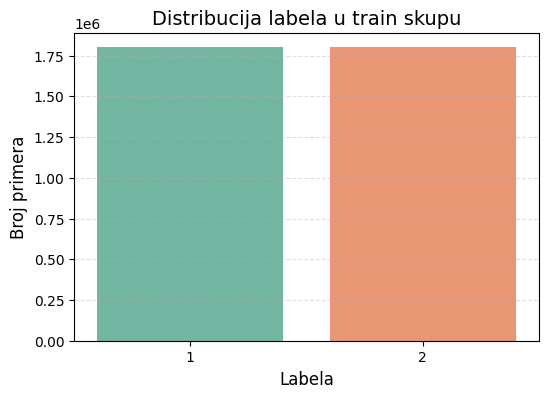

In [14]:
plt.figure(figsize=(6,4))
sns.countplot(x='label', data=train_df, palette='Set2')
plt.title('Distribucija labela u train skupu', fontsize=14)
plt.xlabel('Labela', fontsize=12)
plt.ylabel('Broj primera', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.show()


/var/folders/yw/kbwfb9gn6y59z9jydmclz48h0000gn/T/ipykernel_20885/1290608436.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=test_df, palette='Set2')


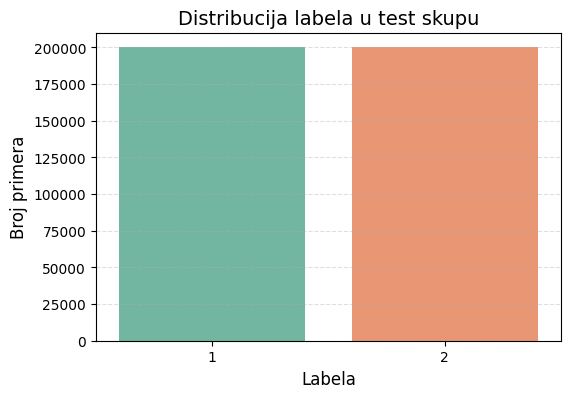

In [15]:
plt.figure(figsize=(6,4))
sns.countplot(x='label', data=test_df, palette='Set2')
plt.title('Distribucija labela u test skupu', fontsize=14)
plt.xlabel('Labela', fontsize=12)
plt.ylabel('Broj primera', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.show()


### Dužina tekstova (broj reči po recenziji)

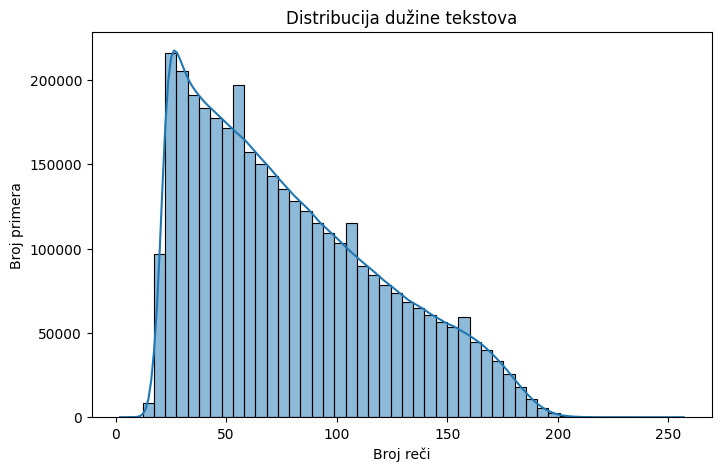

In [16]:
train_df['text_length'] = train_df['text'].apply(lambda x: len(str(x).split()))

plt.figure(figsize=(8,5))
sns.histplot(train_df['text_length'], bins=50, kde=True)
plt.title('Distribucija dužine tekstova')
plt.xlabel('Broj reči')
plt.ylabel('Broj primera')
plt.show()


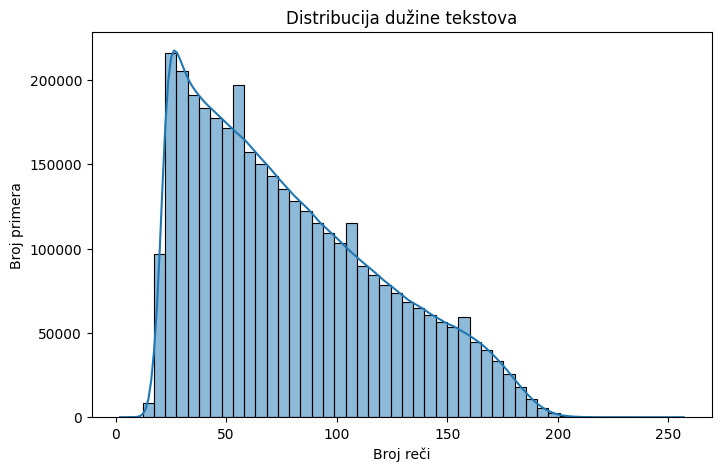

In [17]:
test_df['text_length'] = test_df['text'].apply(lambda x: len(str(x).split()))

plt.figure(figsize=(8,5))
sns.histplot(train_df['text_length'], bins=50, kde=True)
plt.title('Distribucija dužine tekstova')
plt.xlabel('Broj reči')
plt.ylabel('Broj primera')
plt.show()


#### Boxplot dužine po klasama

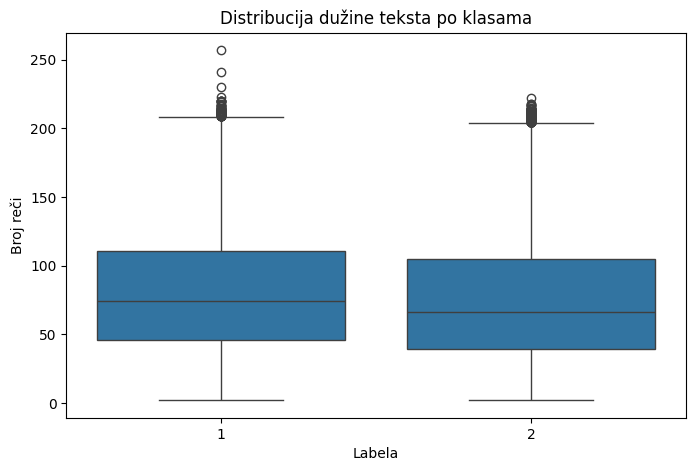

In [18]:
plt.figure(figsize=(8,5))
sns.boxplot(x='label', y='text_length', data=train_df)
plt.title('Distribucija dužine teksta po klasama')
plt.xlabel('Labela')
plt.ylabel('Broj reči')
plt.show()

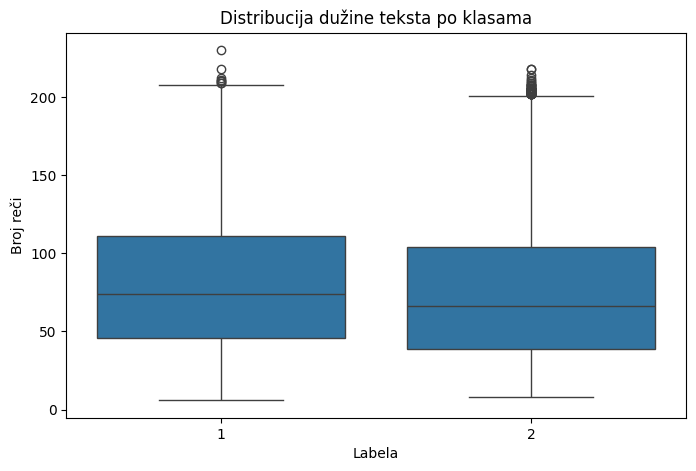

In [19]:
plt.figure(figsize=(8,5))
sns.boxplot(x='label', y='text_length', data=test_df)
plt.title('Distribucija dužine teksta po klasama')
plt.xlabel('Labela')
plt.ylabel('Broj reči')
plt.show()

### WordCloud 

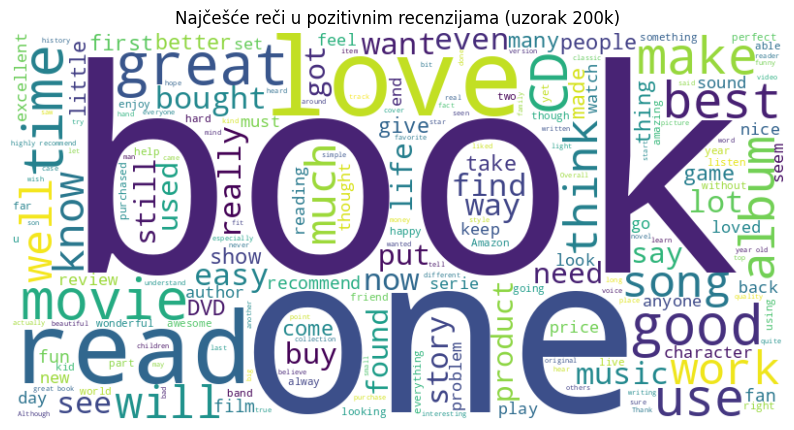

In [20]:
positive_sample = train_df[train_df['label'] == 2].sample(n=200000, random_state=42)
positive_text = " ".join(positive_sample['text'].astype(str).tolist())

wordcloud_pos = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
plt.figure(figsize=(10,6))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title('Najčešće reči u pozitivnim recenzijama (uzorak 200k)')
plt.show()


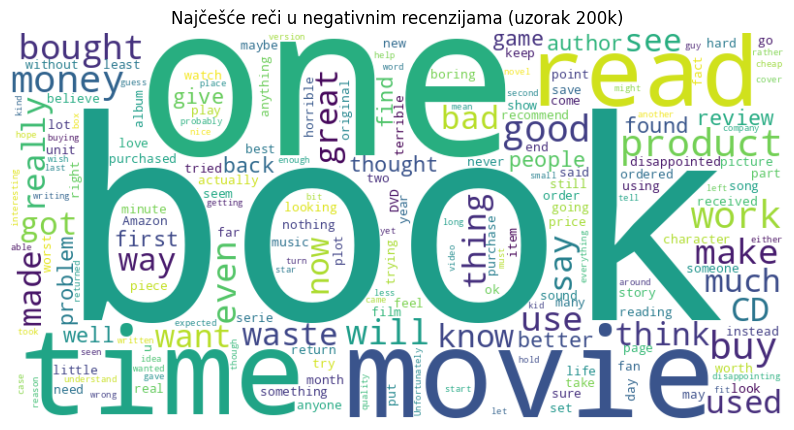

In [21]:
negative_sample = train_df[train_df['label'] == 1].sample(n=200000, random_state=42)
negative_text = " ".join(negative_sample['text'].astype(str).tolist())

wordcloud_pos = WordCloud(width=800, height=400, background_color='white').generate(negative_text)
plt.figure(figsize=(10,6))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title('Najčešće reči u negativnim recenzijama (uzorak 200k)')
plt.show()


/var/folders/yw/kbwfb9gn6y59z9jydmclz48h0000gn/T/ipykernel_20885/3119771590.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y = df1['Word'], x= df1['Frequency'], palette= 'summer')


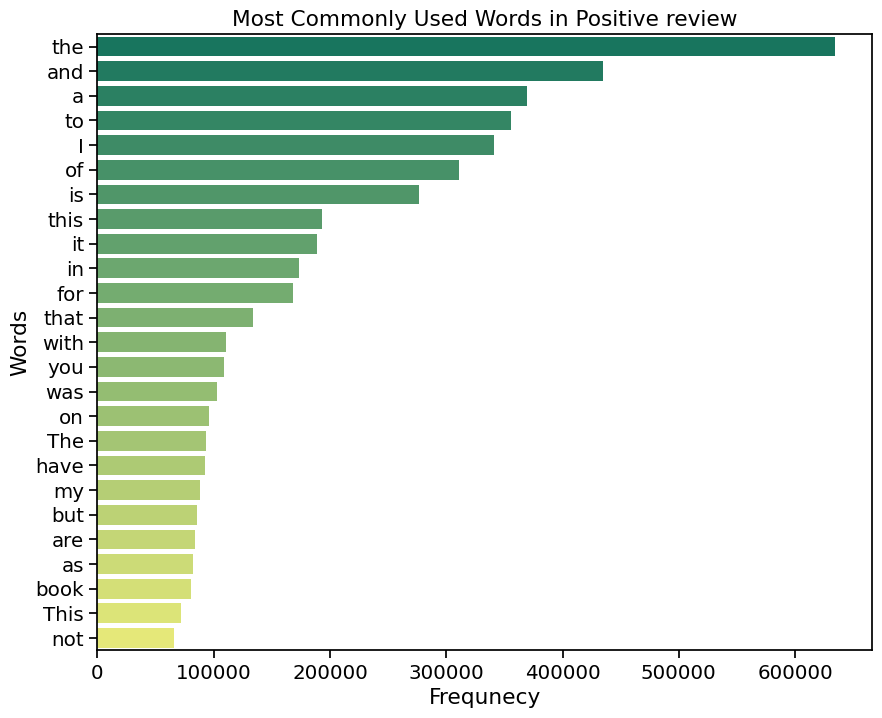

In [22]:
def plot_words_freq(words):
    df1 = pd.DataFrame(Counter(words).most_common(25), columns= ['Word', 'Frequency'])

    sns.set_context('notebook', font_scale= 1.3)
    plt.figure(figsize=(10,8))
    sns.barplot(y = df1['Word'], x= df1['Frequency'], palette= 'summer')
    plt.title("Most Commonly Used Words in Positive review")
    plt.xlabel("Frequnecy")
    plt.ylabel("Words")
    return plt.show()

plot_words_freq((positive_text).split())

/var/folders/yw/kbwfb9gn6y59z9jydmclz48h0000gn/T/ipykernel_20885/2401076245.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y = df1['Word'], x= df1['Frequency'], palette= 'summer')


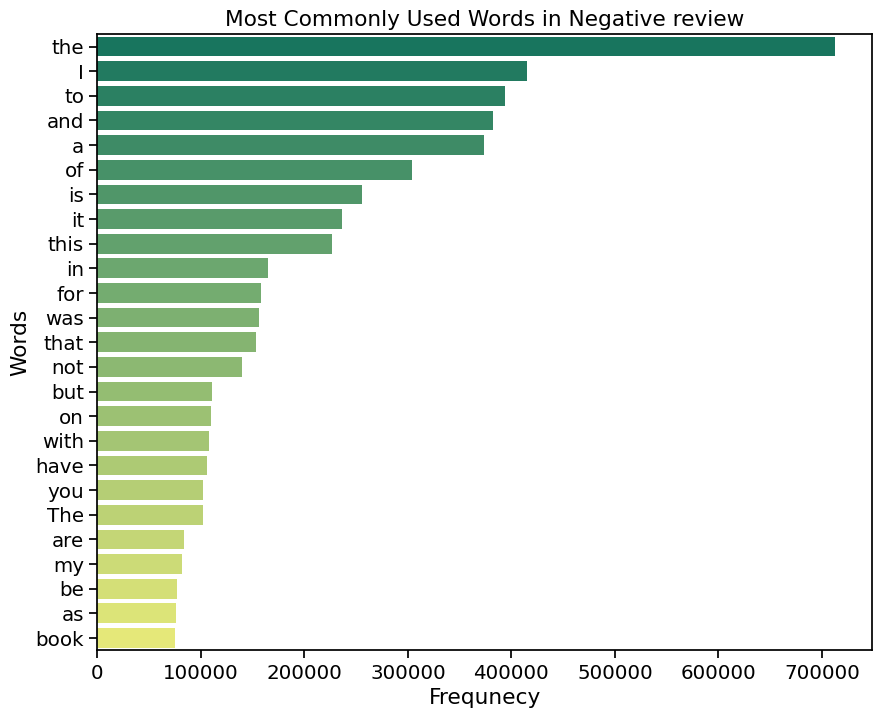

In [23]:
def plot_words_freq(words):
    df1 = pd.DataFrame(Counter(words).most_common(25), columns= ['Word', 'Frequency'])

    sns.set_context('notebook', font_scale= 1.3)
    plt.figure(figsize=(10,8))
    sns.barplot(y = df1['Word'], x= df1['Frequency'], palette= 'summer')
    plt.title("Most Commonly Used Words in Negative review")
    plt.xlabel("Frequnecy")
    plt.ylabel("Words")
    return plt.show()

plot_words_freq((negative_text).split())

### Čišćenje podataka

In [24]:
def clean_text(text):
    
    if not isinstance(text, str):
        return ""

    # Make text lowercase
    text = text.lower()

    # Remove text in square brackets
    text = re.sub('\[.*?\]', '', text)

    # Remove links
    text = re.sub('https?://\S+|www\.\S+', '', text)

    # Remove punctuation
    text = re.sub('[^a-zA-Z0-9\s]+', '', text)

    # Remove words containing numbers
    text = re.sub('\w*\d\w*', '', text)

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    words = text.split()

    filtered_words = [word for word in words if word not in stop_words]
    text = ' '.join(filtered_words)

    # Remove extra whitespace
    text = re.sub('\s+', ' ', text).strip()

    return text

In [25]:
train_df['clean_text'] = train_df['text'].apply(clean_text)
test_df['clean_text'] = test_df['text'].apply(clean_text)

In [26]:
train_df = train_df[train_df['clean_text'].str.strip() != ""]
test_df = test_df[test_df['clean_text'].str.strip() != ""]

In [29]:
train_df['label'] = train_df['label'].replace({2: 1, 1: 0})
test_df['label'] = test_df['label'].replace({2: 1, 1: 0})

In [31]:
train_df.head()

,label,title,review,text,text_length,clean_text
0,1,Stuning even for the non-gamer,This sound track was beautiful! It paints the ...,Stuning even for the non-gamer This sound trac...,80,stuning even nongamer sound track beautiful pa...
1,1,The best soundtrack ever to anything.,I'm reading a lot of reviews saying that this ...,The best soundtrack ever to anything. I'm read...,97,best soundtrack ever anything im reading lot r...
2,1,Amazing!,This soundtrack is my favorite music of all ti...,Amazing! This soundtrack is my favorite music ...,129,amazing soundtrack favorite music time hands i...
3,1,Excellent Soundtrack,I truly like this soundtrack and I enjoy video...,Excellent Soundtrack I truly like this soundtr...,118,excellent soundtrack truly like soundtrack enj...
4,1,"Remember, Pull Your Jaw Off The Floor After He...","If you've played the game, you know how divine...","Remember, Pull Your Jaw Off The Floor After He...",87,remember pull jaw floor hearing youve played g...


In [32]:
test_df.head()

,label,title,review,text,text_length,clean_text
0,1,Great CD,My lovely Pat has one of the GREAT voices of h...,Great CD My lovely Pat has one of the GREAT vo...,106,great cd lovely pat one great voices generatio...
1,1,One of the best game music soundtracks - for a...,Despite the fact that I have only played a sma...,One of the best game music soundtracks - for a...,148,one best game music soundtracks game didnt rea...
2,0,Batteries died within a year ...,I bought this charger in Jul 2003 and it worke...,Batteries died within a year ... I bought this...,60,batteries died within year bought charger jul ...
3,1,"works fine, but Maha Energy is better",Check out Maha Energy's website. Their Powerex...,"works fine, but Maha Energy is better Check ou...",37,works fine maha energy better check maha energ...
4,1,Great for the non-audiophile,Reviewed quite a bit of the combo players and ...,Great for the non-audiophile Reviewed quite a ...,69,great nonaudiophile reviewed quite bit combo p...


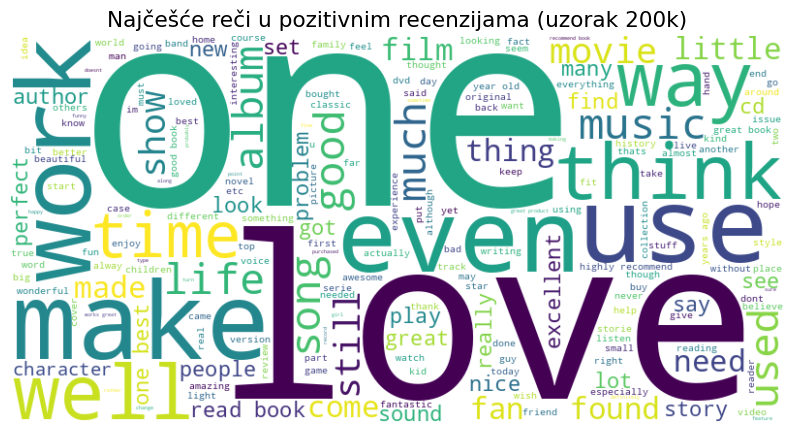

In [34]:
positive_sample = train_df[train_df['label'] == 1].sample(n=200000, random_state=42)
positive_text = " ".join(positive_sample['clean_text'].astype(str).tolist())

wordcloud_pos = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
plt.figure(figsize=(10,6))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title('Najčešće reči u pozitivnim recenzijama (uzorak 200k)')
plt.show()


/var/folders/yw/kbwfb9gn6y59z9jydmclz48h0000gn/T/ipykernel_20885/3119771590.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y = df1['Word'], x= df1['Frequency'], palette= 'summer')


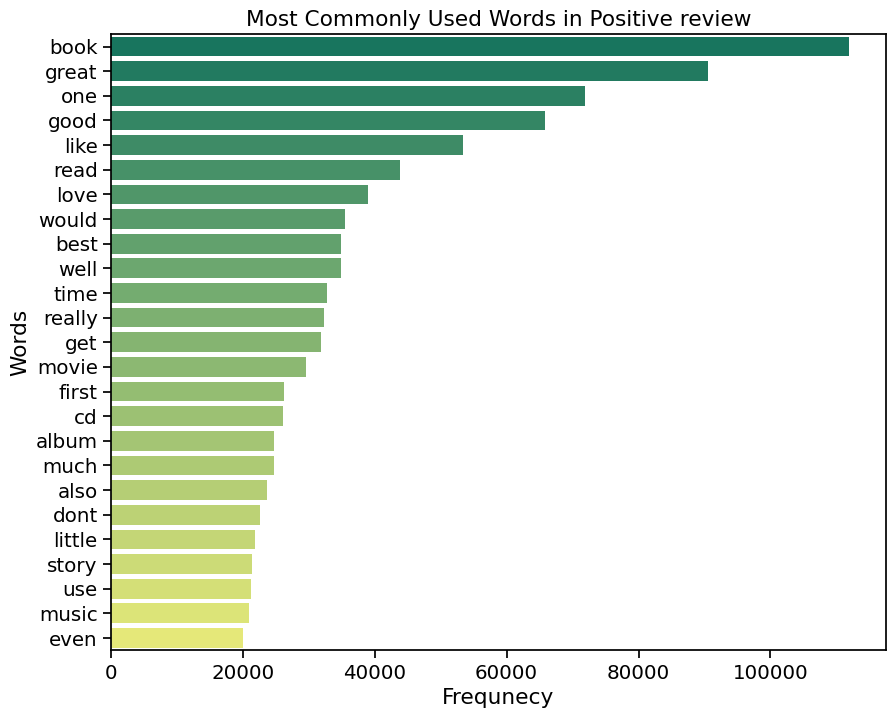

In [35]:
def plot_words_freq(words):
    df1 = pd.DataFrame(Counter(words).most_common(25), columns= ['Word', 'Frequency'])

    sns.set_context('notebook', font_scale= 1.3)
    plt.figure(figsize=(10,8))
    sns.barplot(y = df1['Word'], x= df1['Frequency'], palette= 'summer')
    plt.title("Most Commonly Used Words in Positive review")
    plt.xlabel("Frequnecy")
    plt.ylabel("Words")
    return plt.show()

plot_words_freq((positive_text).split())

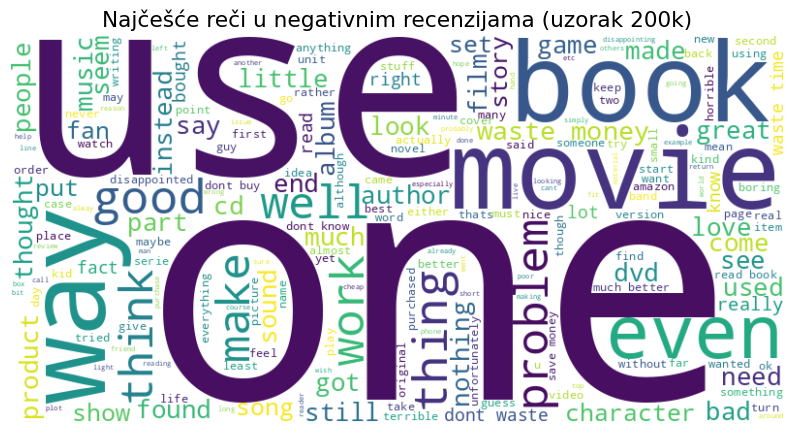

In [36]:
negative_sample = train_df[train_df['label'] == 0].sample(n=200000, random_state=42)
negative_text = " ".join(negative_sample['clean_text'].astype(str).tolist())

wordcloud_pos = WordCloud(width=800, height=400, background_color='white').generate(negative_text)
plt.figure(figsize=(10,6))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title('Najčešće reči u negativnim recenzijama (uzorak 200k)')
plt.show()


/var/folders/yw/kbwfb9gn6y59z9jydmclz48h0000gn/T/ipykernel_20885/2401076245.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y = df1['Word'], x= df1['Frequency'], palette= 'summer')


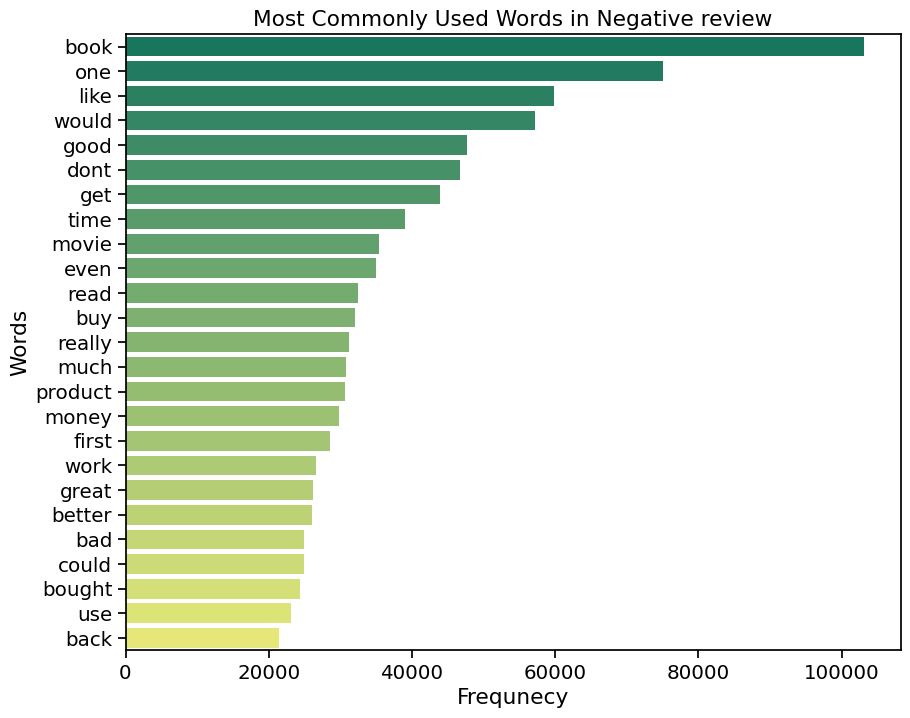

In [37]:
def plot_words_freq(words):
    df1 = pd.DataFrame(Counter(words).most_common(25), columns= ['Word', 'Frequency'])

    sns.set_context('notebook', font_scale= 1.3)
    plt.figure(figsize=(10,8))
    sns.barplot(y = df1['Word'], x= df1['Frequency'], palette= 'summer')
    plt.title("Most Commonly Used Words in Negative review")
    plt.xlabel("Frequnecy")
    plt.ylabel("Words")
    return plt.show()

plot_words_freq((negative_text).split())

### Podela podataka train, val, test

In [38]:
train_df, val_df = train_test_split(
    train_df,
    test_size=0.1,
    random_state=42,
    stratify=train_df['label']
)

print("Train:", train_df.shape)
print("Validation:", val_df.shape)
print("Test:", test_df.shape)

Train: (3239988, 6)
Validation: (359999, 6)
Test: (399999, 6)


In [39]:
train_df.to_csv('data/train_df.csv', index=False)
val_df.to_csv('data/val_df.csv', index=False)
test_df.to_csv('data/test_df.csv', index=False)